In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

In [5]:
nodes=pd.read_csv("data/clean_nodes.csv")
edges=pd.read_csv("data/clean_edges.csv")

In [6]:
nodes.head(10)

,id,name,kind
0,Anatomy::UBERON:0000002,uterine cervix,Anatomy
1,Anatomy::UBERON:0000004,nose,Anatomy
2,Anatomy::UBERON:0000006,islet of Langerhans,Anatomy
3,Anatomy::UBERON:0000007,pituitary gland,Anatomy
4,Anatomy::UBERON:0000010,peripheral nervous system,Anatomy
5,Anatomy::UBERON:0000011,parasympathetic nervous system,Anatomy
6,Anatomy::UBERON:0000013,sympathetic nervous system,Anatomy
7,Anatomy::UBERON:0000020,sense organ,Anatomy
8,Anatomy::UBERON:0000026,appendage,Anatomy
9,Anatomy::UBERON:0000029,lymph node,Anatomy


In [7]:
edges.head(10)

,source,relation,target
0,Gene::9021,GpBP,Biological Process::GO:0071357
1,Gene::51676,GpBP,Biological Process::GO:0098780
2,Gene::19,GpBP,Biological Process::GO:0055088
3,Gene::3176,GpBP,Biological Process::GO:0010243
4,Gene::3039,GpBP,Biological Process::GO:0006898
5,Gene::5962,GpBP,Biological Process::GO:0051346
6,Gene::841,GpBP,Biological Process::GO:0043207
7,Gene::6924,GpBP,Biological Process::GO:0006354
8,Gene::7407,GpBP,Biological Process::GO:0006417
9,Gene::9370,GpBP,Biological Process::GO:0030852


In [8]:
nodes["kind"].value_counts()

kind
Gene                   20945
Biological Process     11381
Side Effect             5734
Molecular Function      2884
Pathway                 1822
Compound                1552
Cellular Component      1391
Symptom                  438
Anatomy                  402
Pharmacologic Class      345
Disease                  137
Name: count, dtype: int64

In [9]:
edges["relation"].value_counts()

relation
GpBP    559504
AeG     526407
Gr>G    265672
GiG     147164
CcSE    138944
AdG     102240
AuG      97848
GpMF     97222
GpPW     84372
GpCC     73566
GcG      61690
CdG      21102
CuG      18756
DaG      12623
CbG      11571
DuG       7731
DdG       7623
CrC       6486
DlA       3602
DpS       3357
PCiC      1029
CtD        755
DrD        543
CpD        390
Name: count, dtype: int64

In [10]:
print(nodes["kind"].unique())
print(edges["relation"].unique())

['Anatomy' 'Biological Process' 'Cellular Component' 'Compound' 'Disease'
 'Gene' 'Molecular Function' 'Pathway' 'Pharmacologic Class' 'Side Effect'
 'Symptom']
['GpBP' 'GiG' 'CrC' 'DdG' 'DpS' 'DlA' 'CtD' 'CbG' 'CuG' 'DrD' 'DaG' 'CpD'
 'AdG' 'AuG' 'GcG' 'GpMF' 'PCiC' 'GpCC' 'Gr>G' 'CdG' 'DuG' 'GpPW' 'CcSE'
 'AeG']


In [11]:
drug_nodes=nodes[nodes["kind"]=="Compound"]
disease_nodes=nodes[nodes["kind"]=="Disease"]
gene_nodes=nodes[nodes["kind"]=="Gene"]

In [12]:
sub_edges = edges[
(edges["source"].isin(drug_nodes["id"]) & edges["target"].isin(disease_nodes["id"]) & (edges["relation"]=="CtD")) |
(edges["source"].isin(drug_nodes["id"]) & edges["target"].isin(gene_nodes["id"]) & (edges["relation"]=="CbG")) |
(edges["source"].isin(gene_nodes["id"]) & edges["target"].isin(disease_nodes["id"]) & (edges["relation"]=="DdG"))
]

In [13]:
G_sub = nx.from_pandas_edgelist(sub_edges,"source","target",create_using=nx.Graph())
print("nodes:",G_sub.number_of_nodes(),"edges:",G_sub.number_of_edges())

nodes: 3160 edges: 12326


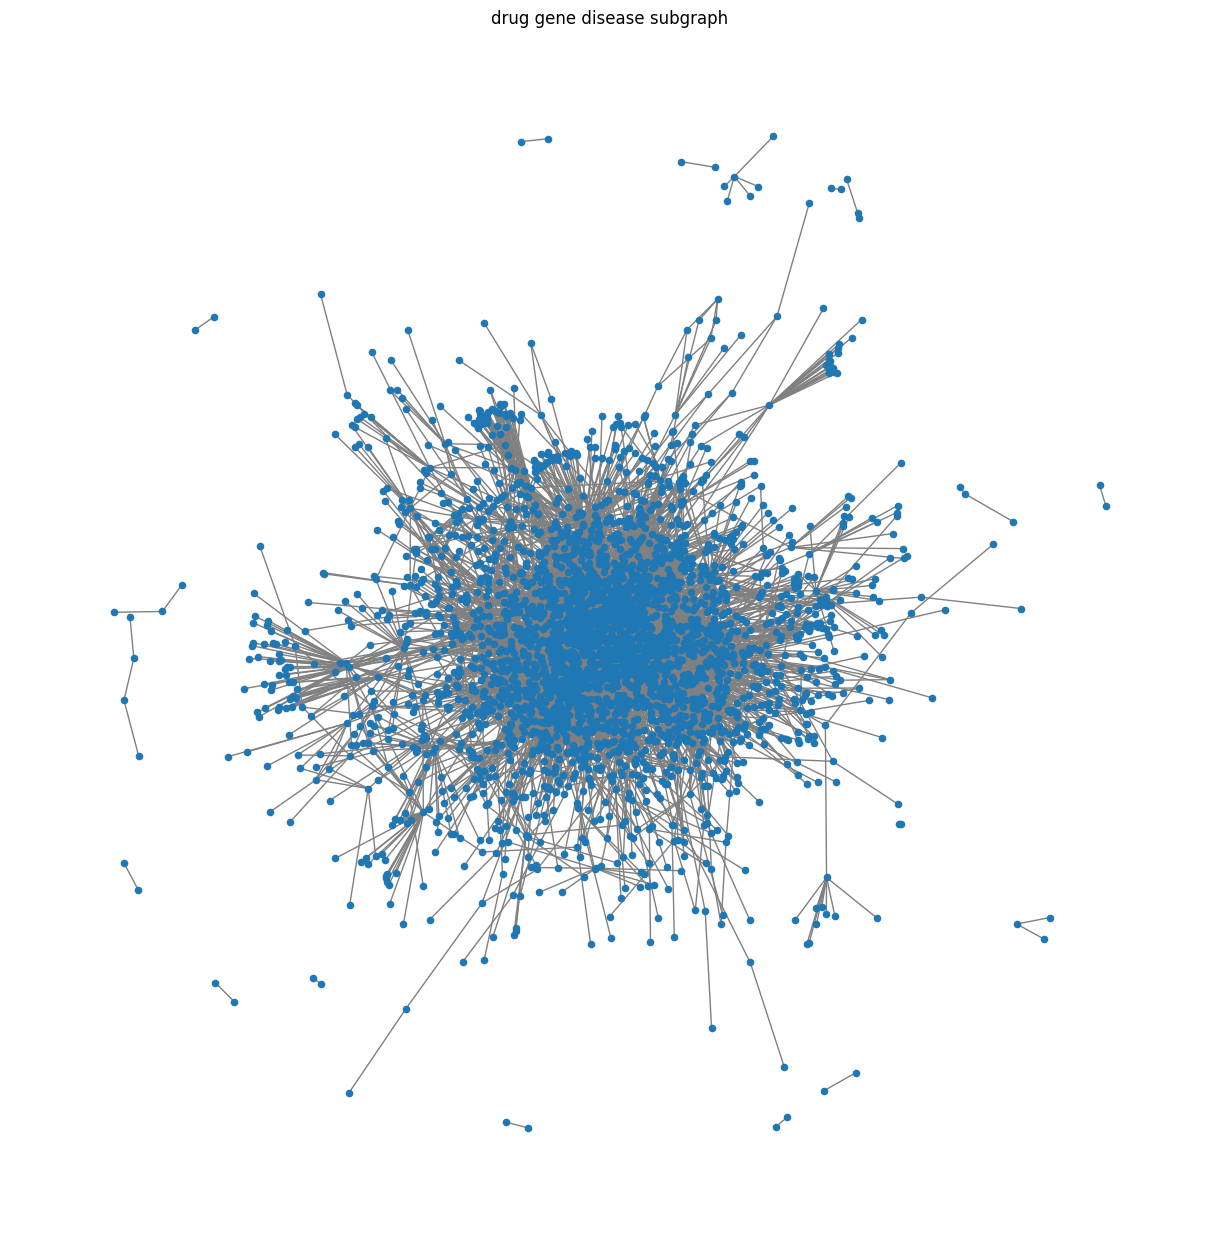

In [14]:
plt.figure(figsize=(12,12))
pos=nx.spring_layout(G_sub,k=0.15)
nx.draw(G_sub,pos,node_size=20,edge_color="gray")
plt.title("drug gene disease subgraph")
plt.show()

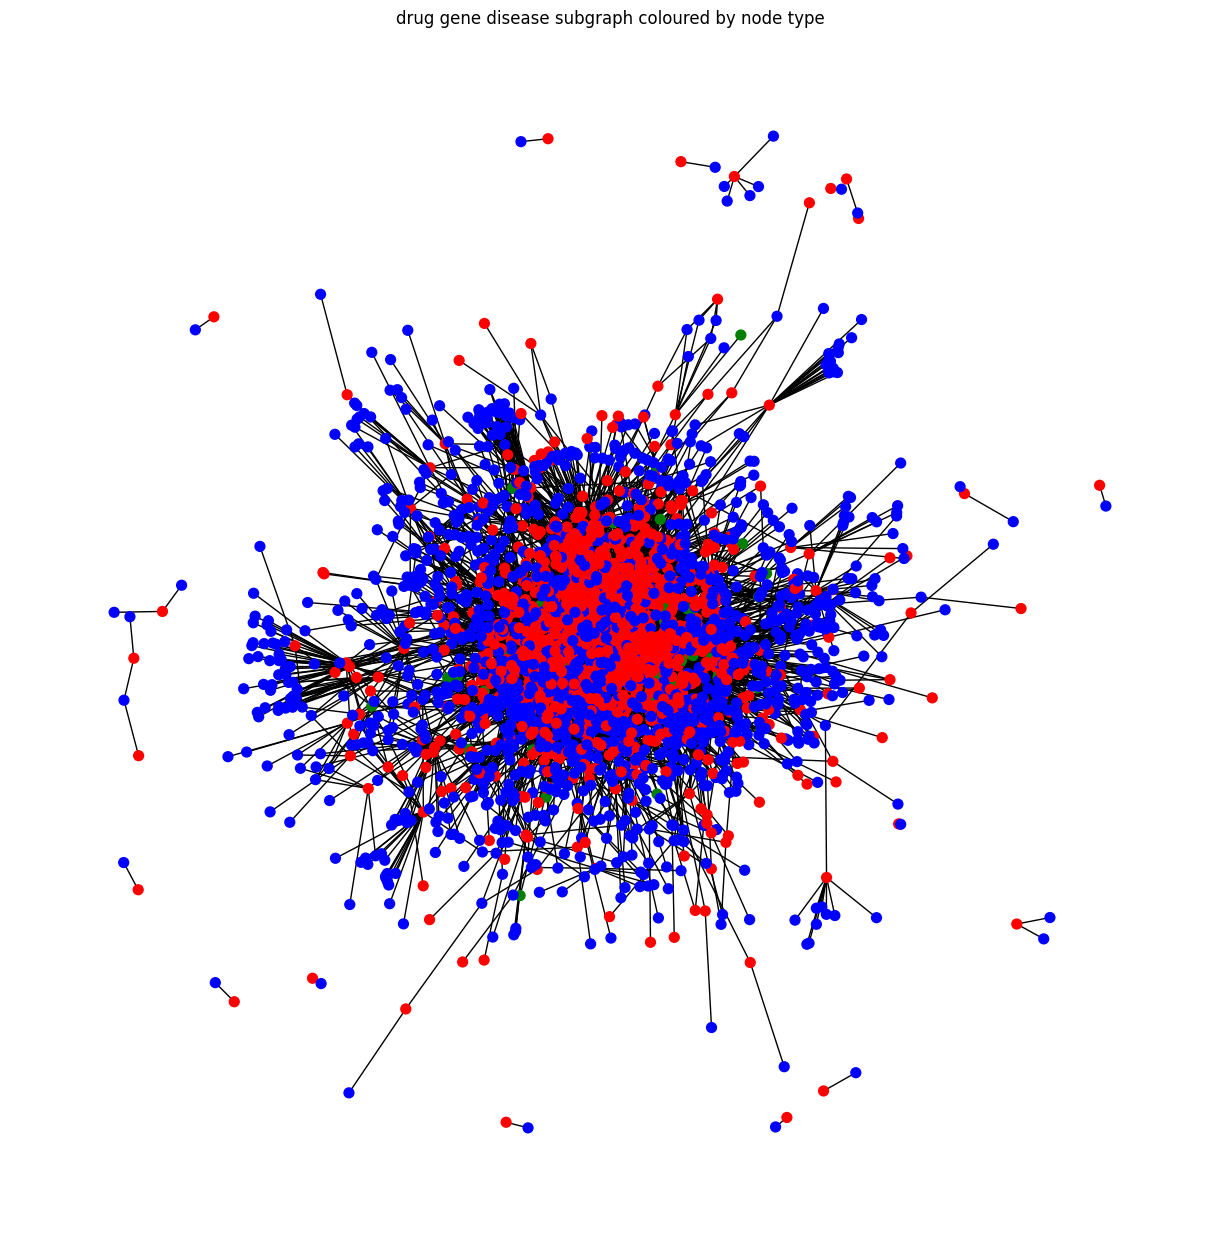

In [15]:
node_colors=[]
for n in G_sub.nodes():
    t=nodes.loc[nodes["id"]==n,"kind"].values[0]
    if t=="Compound": node_colors.append("red")
    elif t=="Disease": node_colors.append("green")
    elif t=="Gene": node_colors.append("blue")
    else: node_colors.append("gray")
plt.figure(figsize=(12,12))
nx.draw(G_sub,pos,node_color=node_colors,node_size=50,with_labels=False)
plt.title("drug gene disease subgraph coloured by node type")
plt.show()

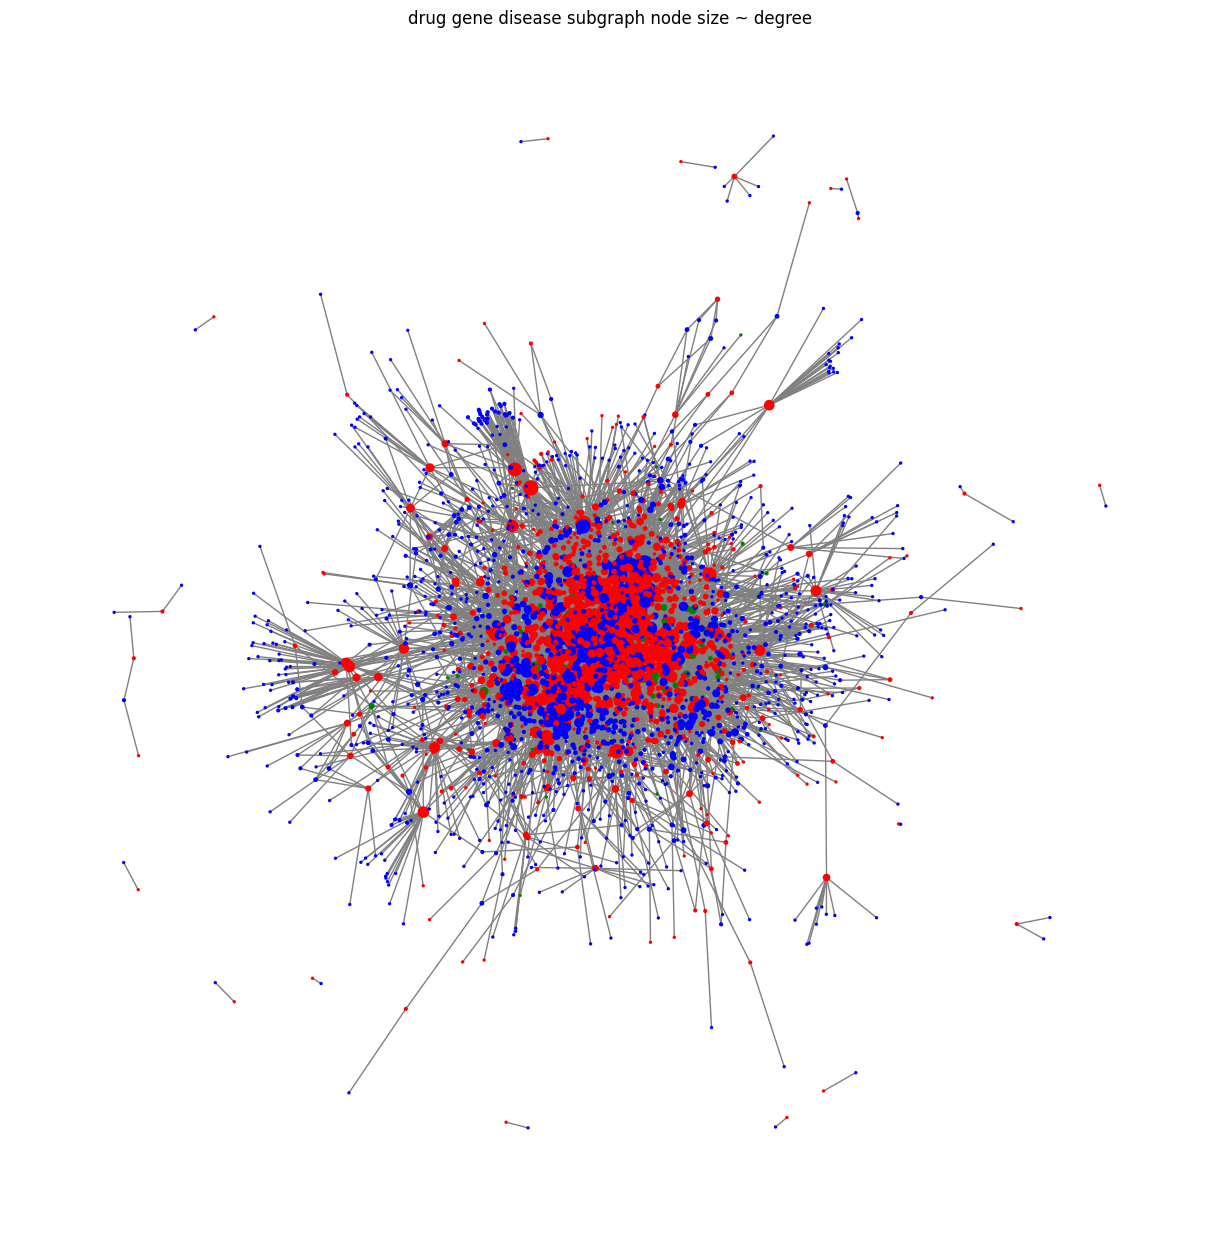

In [16]:
deg_dict=dict(G_sub.degree())
node_size=[v*2 for v in deg_dict.values()]
plt.figure(figsize=(12,12))
nx.draw(G_sub,pos,node_color=node_colors,node_size=node_size,with_labels=False,edge_color="gray")
plt.title("drug gene disease subgraph node size ~ degree")
plt.show()

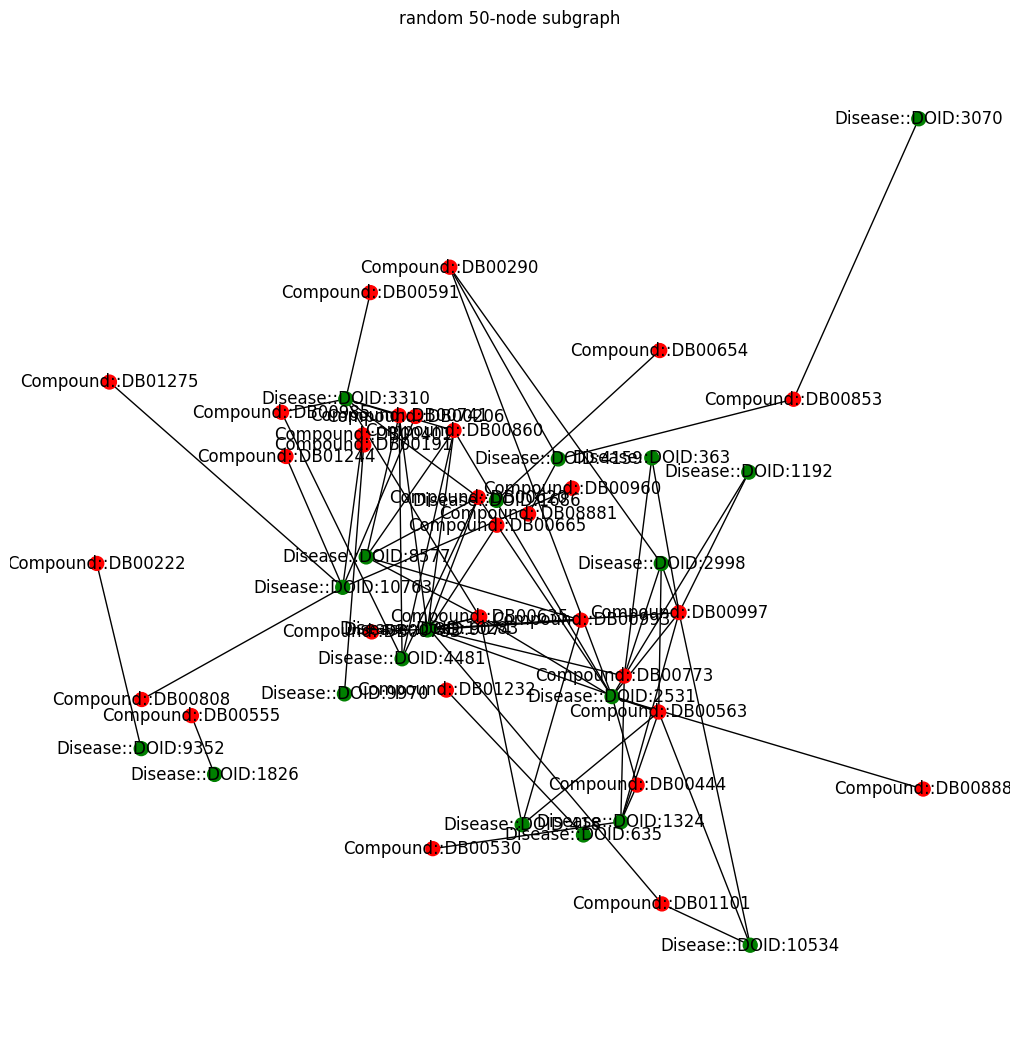

In [17]:
sample_nodes=list(G_sub.nodes())[:50]
G_sample=G_sub.subgraph(sample_nodes)
plt.figure(figsize=(10,10))
nx.draw(G_sample,pos={n:pos[n] for n in sample_nodes},
        node_color=[node_colors[list(G_sub.nodes()).index(n)] for n in G_sample.nodes()],
        node_size=100,with_labels=True)
plt.title("random 50-node subgraph")
plt.show()